In [1]:
library(dplyr)
library(readxl)
library(terra)
library(gpkg)
library(reshape2)
library(sf)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘terra’ was built under R version 4.3.3”
terra 1.7.78

Warning message:
“package ‘gpkg’ was built under R version 4.3.3”
Warning message:
“package ‘sf’ was built under R version 4.3.3”
Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE



In [2]:
file_path <- "/Users/pavlina/Documents/Helsinki/2nd_Semester/Sustainability_DS/project/folder/Results/UrbanAtlasBBox.gpkg"

# Read the GeoPackage
urban_atlas <- st_read(file_path)

Reading layer `UA2018_FUA788' from data source 
  `/Users/pavlina/Documents/Helsinki/2nd_Semester/Sustainability_DS/project/folder/Results/UrbanAtlasBBox.gpkg' 
  using driver `GPKG'
Simple feature collection with 26026 features and 13 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 5114679 ymin: 4187922 xmax: 5165072 ymax: 4237411
Projected CRS: ETRS89-extended / LAEA Europe


In [3]:
st_layers(file_path)

name          geomtype driver features fields
1 UA2018_FUA788          GPKG   26026    13    
  crs                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [4]:

urban_atlas <- st_read(file_path, layer = "UA2018_FUA788")


Reading layer `UA2018_FUA788' from data source 
  `/Users/pavlina/Documents/Helsinki/2nd_Semester/Sustainability_DS/project/folder/Results/UrbanAtlasBBox.gpkg' 
  using driver `GPKG'
Simple feature collection with 26026 features and 13 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 5114679 ymin: 4187922 xmax: 5165072 ymax: 4237411
Projected CRS: ETRS89-extended / LAEA Europe


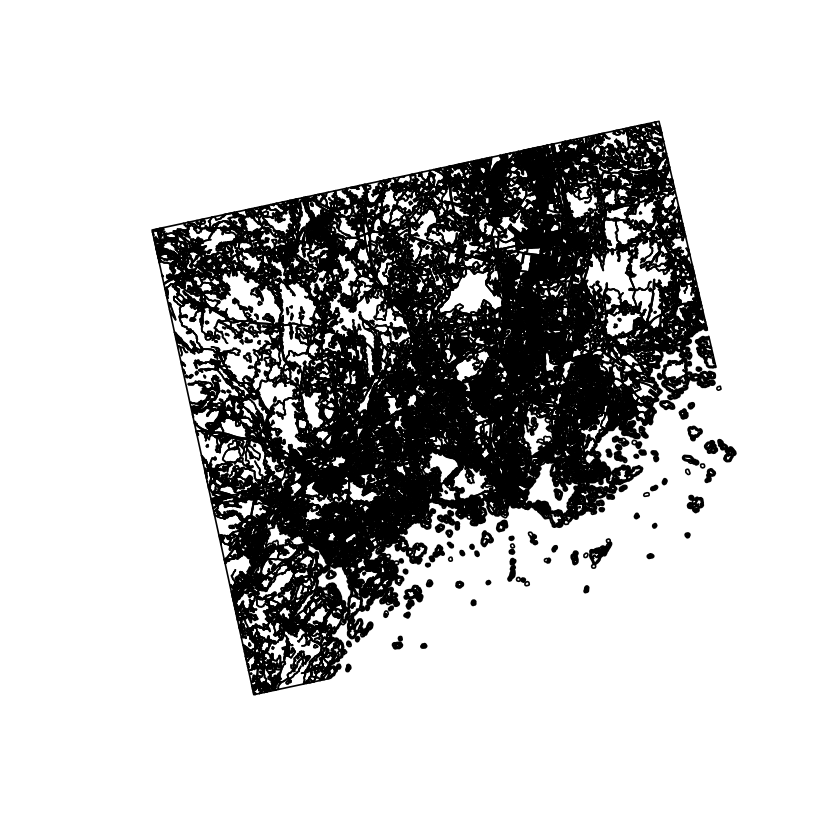

In [5]:
plot(st_geometry(urban_atlas))

In [6]:
head(urban_atlas)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



,OBJECTID,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment,Shape_Length,Shape_Area,geom
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
1,9089149,FI,Helsinki,FI001L3,12100,"Industrial, commercial, public, military and private units",2020-06,34366-FI001L3,1670.3361,45432.133,,1670.3361,45432.133,MULTIPOLYGON (((5127773 420...
2,9089150,FI,Helsinki,FI001L3,11100,Continuous urban fabric (S.L. : > 80%),2020-06,368-FI001L3,450.0501,12396.216,,450.0501,12396.216,MULTIPOLYGON (((5145311 420...
3,9089151,FI,Helsinki,FI001L3,11220,Discontinuous medium density urban fabric (S.L. : 30% - 50%),2020-06,6732-FI001L3,308.3651,5544.102,,308.3651,5544.102,MULTIPOLYGON (((5148144 423...
4,9089166,FI,Helsinki,FI001L3,50000,Water,2020-06,64884-FI001L3,8826.3647,519431.755,,8826.3646,519431.777,MULTIPOLYGON (((5162380 420...
5,9089168,FI,Helsinki,FI001L3,50000,Water,2020-06,65011-FI001L3,14526.8819,861953.567,,14526.8818,861953.564,MULTIPOLYGON (((5152501 420...
6,9089173,FI,Helsinki,FI001L3,11220,Discontinuous medium density urban fabric (S.L. : 30% - 50%),2020-06,4712-FI001L3,2408.2405,94692.821,,2408.2405,94692.819,MULTIPOLYGON (((5129605 420...


In [7]:
unique(urban_atlas$class_2018)

[1] "Industrial, commercial, public, military and private units"                     
 [2] "Continuous urban fabric (S.L. : > 80%)"                                         
 [3] "Discontinuous medium density urban fabric (S.L. : 30% - 50%)"                   
 [4] "Water"                                                                          
 [5] "Discontinuous dense urban fabric (S.L. : 50% -  80%)"                           
 [6] "Discontinuous low density urban fabric (S.L. : 10% - 30%)"                      
 [7] "Fast transit roads and associated land"                                         
 [8] "Discontinuous very low density urban fabric (S.L. : < 10%)"                     
 [9] "Other roads and associated land"                                                
[10] "Isolated structures"                                                            
[11] "Railways and associated land"                                                   
[12] "Port areas"                                                                     
[13] "Green urban areas"                                                              
[14] "Sports and leisure facilities"                                                  
[15] "Arable land (annual crops)"                                                     
[16] "Pastures"                                                                       
[17] "Forests"                                                                        
[18] "Land without current use"                                                       
[19] "Mineral extraction and dump sites"                                              
[20] "Airports"                                                                       
[21] "Construction sites"                                                             
[22] "Herbaceous vegetation associations (natural grassland, moors...)"               
[23] "Wetlands"                                                                       
[24] "Open spaces with little or no vegetation (beaches, dunes, bare rocks, glaciers)"

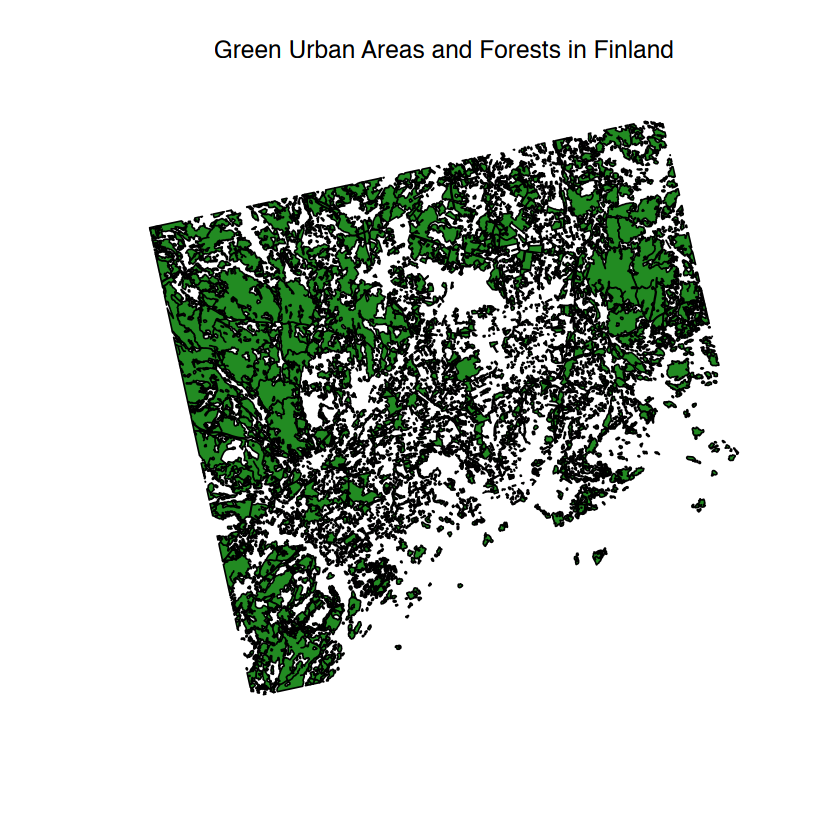

In [8]:
# Filter for Green Urban Areas and Forests
green_areas <- urban_atlas[urban_atlas$class_2018 %in% c("Green urban areas", "Forests"), ]

plot(st_geometry(green_areas), col = "forestgreen", main = "Green Urban Areas and Forests in Finland")


[1] "gpkg_contents"                   "gpkg_extensions"                
 [3] "gpkg_geometry_columns"           "gpkg_metadata"                  
 [5] "gpkg_metadata_reference"         "gpkg_ogr_contents"              
 [7] "gpkg_spatial_ref_sys"            "gpkg_tile_matrix"               
 [9] "gpkg_tile_matrix_set"            "osaalueet_WFS"                  
[11] "rtree_osaalueet_WFS_geom"        "rtree_osaalueet_WFS_geom_node"  
[13] "rtree_osaalueet_WFS_geom_parent" "rtree_osaalueet_WFS_geom_rowid" 
[15] "sqlite_sequence"

,fid,geom,gml_id,id,aluejako,kunta,tunnus,nimi_fi,nimi_se,yhtluontipvm,yhtmuokkauspvm,yhtdatanomistaja,kokotunnus,paivitetty_tietopalveluun,datanomistaja
,<int>,<blob>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,blob[3.85 kB],Piirijako_osaalue.114470,114470,OSA-ALUE,091,392,Tapanila,Mosabacka,NA,2021-11-23T00:00:00,kmo,0915503392,2025-03-03T00:00:00,Helsinki/Kami
2,2,blob[2.15 kB],Piirijako_osaalue.114471,114471,OSA-ALUE,091,385,Malmin lentokenttä,Malms flygfält,NA,2024-12-09T00:00:00,kmo,0915503385,2025-03-03T00:00:00,Helsinki/Kami
3,3,blob[1.75 kB],Piirijako_osaalue.112880,112880,OSA-ALUE,091,121,Harju,Ås,NA,2019-12-04T00:00:00,NA,0913302121,2025-03-03T00:00:00,Helsinki/Kami
4,4,blob[1.24 kB],Piirijako_osaalue.112881,112881,OSA-ALUE,091,122,Alppila,Alphyddan,NA,2021-11-23T00:00:00,NA,0913302122,2025-03-03T00:00:00,Helsinki/Kami
5,5,blob[1.99 kB],Piirijako_osaalue.112882,112882,OSA-ALUE,091,130,Etu-Töölö,Främre Tölö,NA,NA,NA,0911103130,2025-03-03T00:00:00,Helsinki/Kami
6,6,blob[3.83 kB],Piirijako_osaalue.114469,114469,OSA-ALUE,091,411,Puistola,Parkstad,NA,2019-12-04T00:00:00,kmo,0915505411,2025-03-03T00:00:00,Helsinki/Kami


$osaalueet_WFS
 class       : SpatVector 
 geometry    : polygons 
 dimensions  : 148, 13  (geometries, attributes)
 extent      : 25487917, 25514074, 6645439, 6687279  (xmin, xmax, ymin, ymax)
 source      : osaalueet_WFS.gpkg
 coord. ref. : ETRS89 / GK25FIN (EPSG:3879) 
 names       :          gml_id     id aluejako kunta tunnus         nimi_fi
 type        :           <chr>  <int>    <chr> <chr>  <chr>           <chr>
 values      : Piirijako_osaa~ 114470 OSA-ALUE   091    392        Tapanila
               Piirijako_osaa~ 114471 OSA-ALUE   091    385 Malmin lentoke~
               Piirijako_osaa~ 112880 OSA-ALUE   091    121           Harju
        nimi_se yhtluontipvm  yhtmuokkauspvm yhtdatanomistaja (and 3 more)
          <chr>        <chr>           <chr>            <chr>             
      Mosabacka           NA 2021-11-23T00:~              kmo             
 Malms flygfält           NA 2024-12-09T00:~              kmo             
             Ås           NA 2019-12-04T00:~   

 class       : SpatVector 
 geometry    : polygons 
 dimensions  : 148, 13  (geometries, attributes)
 extent      : 25487917, 25514074, 6645439, 6687279  (xmin, xmax, ymin, ymax)
 source      : osaalueet_WFS.gpkg
 coord. ref. : ETRS89 / GK25FIN (EPSG:3879) 
 names       :          gml_id     id aluejako kunta tunnus         nimi_fi
 type        :           <chr>  <int>    <chr> <chr>  <chr>           <chr>
 values      : Piirijako_osaa~ 114470 OSA-ALUE   091    392        Tapanila
               Piirijako_osaa~ 114471 OSA-ALUE   091    385 Malmin lentoke~
               Piirijako_osaa~ 112880 OSA-ALUE   091    121           Harju
        nimi_se yhtluontipvm  yhtmuokkauspvm yhtdatanomistaja (and 3 more)
          <chr>        <chr>           <chr>            <chr>             
      Mosabacka           NA 2021-11-23T00:~              kmo             
 Malms flygfält           NA 2024-12-09T00:~              kmo             
             Ås           NA 2019-12-04T00:~               NA 

 class       : SpatVector 
 geometry    : points 
 dimensions  : 148, 13  (geometries, attributes)
 extent      : 25491215, 25512819, 6654480, 6685887  (xmin, xmax, ymin, ymax)
 coord. ref. : ETRS89 / GK25FIN (EPSG:3879) 
 names       :          gml_id     id aluejako kunta tunnus         nimi_fi
 type        :           <chr>  <int>    <chr> <chr>  <chr>           <chr>
 values      : Piirijako_osaa~ 114470 OSA-ALUE   091    392        Tapanila
               Piirijako_osaa~ 114471 OSA-ALUE   091    385 Malmin lentoke~
               Piirijako_osaa~ 112880 OSA-ALUE   091    121           Harju
        nimi_se yhtluontipvm  yhtmuokkauspvm yhtdatanomistaja (and 3 more)
          <chr>        <chr>           <chr>            <chr>             
      Mosabacka           NA 2021-11-23T00:~              kmo             
 Malms flygfält           NA 2024-12-09T00:~              kmo             
             Ås           NA 2019-12-04T00:~               NA             

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`


[1] 3
[1] 5
[1] 7
[1] 9
[1] 11
[1] 13
[1] 15
[1] 17
[1] 19
[1] 21
[1] 23
[1] 25
[1] 27
'data.frame':	2366 obs. of  7 variables:
 $ Area                       : chr  "091 1 Eteläinen suurpiiri" "091 101 Vironniemen peruspiiri" "091 10 Kruununhaka" "091 20 Kluuvi" ...
 $ Population 31.12           : chr  "90339" "10585" "6309" "408" ...
 $ Mean taxable income (euros): chr  "50239" "51907" "50473" "52129" ...
 $ Year                       : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ kunta                      : int  91 91 91 91 91 91 91 91 91 91 ...
 $ tunnus                     : chr  "1" "101" "010" "020" ...
 $ name_fi                    : chr  "Eteläinen suurpiiri" "Vironniemen peruspiiri" "Kruununhaka" "Kluuvi" ...


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Mean taxable income (euros) = ifelse(`Mean taxable income
  (euros)` == "..", 0, as.double(`Mean taxable income (euros)`))`.
Caused by warning in `ifelse()`:
! NAs introduced by coercion”



FALSE  TRUE 
    8   140 

tunnus23  tunnus82  tunnus86 tunnus126 tunnus129 tunnus134 tunnus144 tunnus146 
    "286"     "314"     "212"     "500"     "531"     "533"     "548"     "549"

,kunta,tunnus,nimi_fi
,<chr>,<chr>,<chr>
23,091,286,Maunulanpuisto
82,091,314,Koivusaari
86,091,212,Hermanninranta
126,091,500,Villinki
129,091,531,Länsisaaret
134,091,533,Aluemeri
144,091,548,Niinisaari
146,091,549,Mustavuori


 class       : SpatVector 
 geometry    : polygons 
 dimensions  : 140, 13  (geometries, attributes)
 extent      : 25490664, 25514074, 6660059, 6687279  (xmin, xmax, ymin, ymax)
 coord. ref. : ETRS89 / GK25FIN (EPSG:3879) 
 names       :          gml_id     id aluejako kunta tunnus         nimi_fi
 type        :           <chr>  <int>    <chr> <chr>  <chr>           <chr>
 values      : Piirijako_osaa~ 114470 OSA-ALUE   091    392        Tapanila
               Piirijako_osaa~ 114471 OSA-ALUE   091    385 Malmin lentoke~
               Piirijako_osaa~ 112880 OSA-ALUE   091    121           Harju
        nimi_se yhtluontipvm  yhtmuokkauspvm yhtdatanomistaja (and 3 more)
          <chr>        <chr>           <chr>            <chr>             
      Mosabacka           NA 2021-11-23T00:~              kmo             
 Malms flygfält           NA 2024-12-09T00:~              kmo             
             Ås           NA 2019-12-04T00:~               NA             

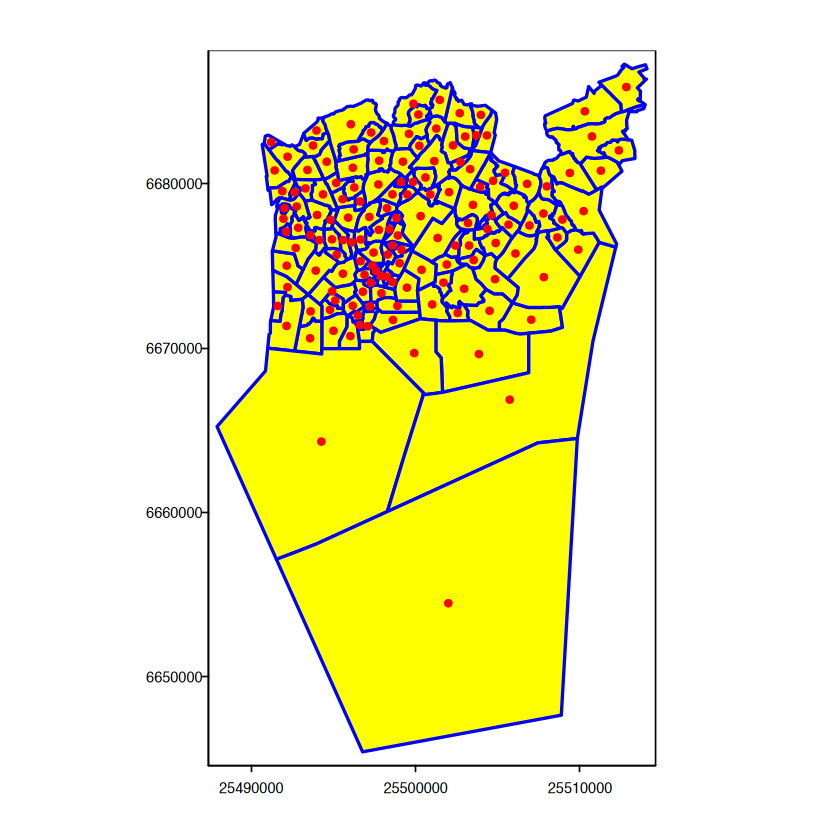

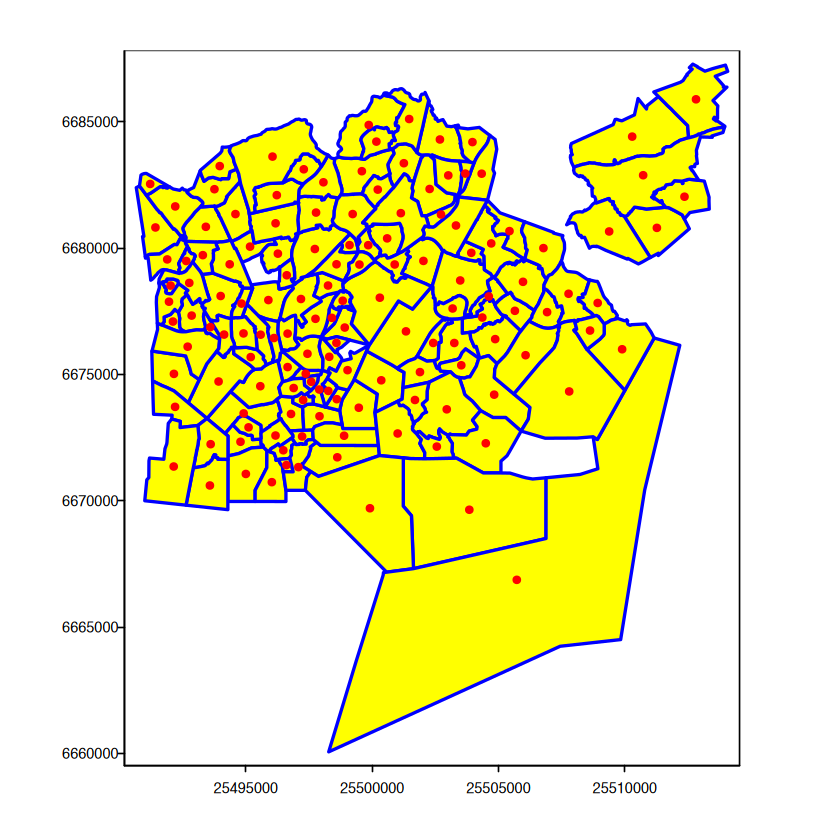

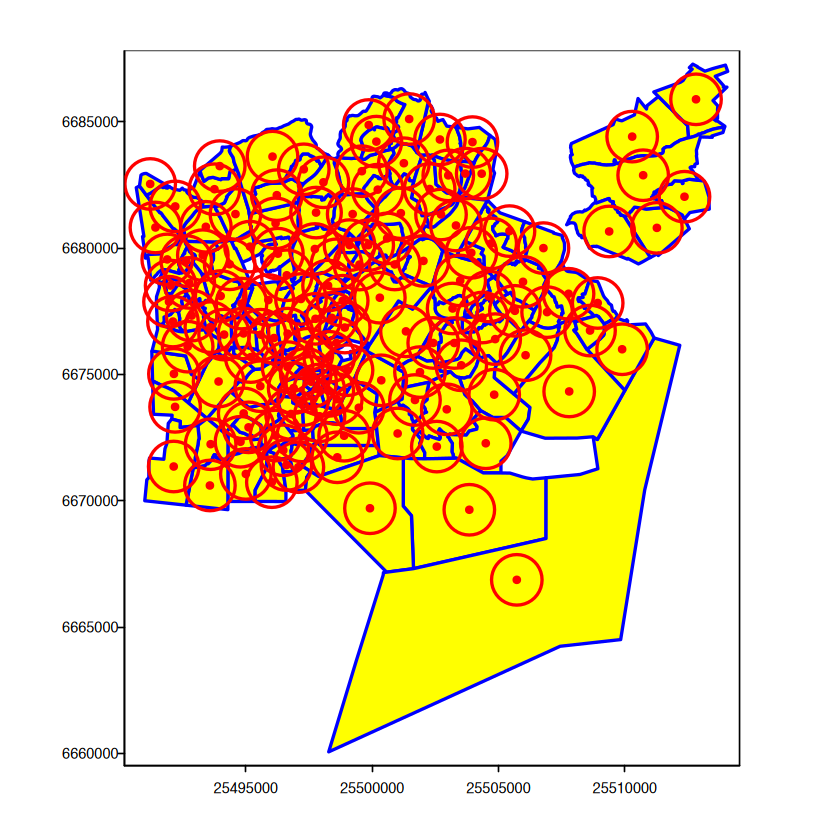

[1] "Ylre_viheralue_asemakaavoitettu"                  
 [2] "gpkg_contents"                                    
 [3] "gpkg_extensions"                                  
 [4] "gpkg_geometry_columns"                            
 [5] "gpkg_metadata"                                    
 [6] "gpkg_metadata_reference"                          
 [7] "gpkg_ogr_contents"                                
 [8] "gpkg_spatial_ref_sys"                             
 [9] "gpkg_tile_matrix"                                 
[10] "gpkg_tile_matrix_set"                             
[11] "rtree_Ylre_viheralue_asemakaavoitettu_geom"       
[12] "rtree_Ylre_viheralue_asemakaavoitettu_geom_node"  
[13] "rtree_Ylre_viheralue_asemakaavoitettu_geom_parent"
[14] "rtree_Ylre_viheralue_asemakaavoitettu_geom_rowid" 
[15] "sqlite_sequence"

$Ylre_viheralue_asemakaavoitettu
 class       : SpatVector 
 geometry    : polygons 
 dimensions  : 2831, 24  (geometries, attributes)
 extent      : 25490725, 25513208, 6670126, 6686297  (xmin, xmax, ymin, ymax)
 source      : Ylre_viheralue_asemakaavoitettu.gpkg
 coord. ref. : ETRS89 / GK25FIN (EPSG:3879) 
 names       :          gml_id viheralue_id puistonumero puistonimi_id
 type        :           <chr>        <num>        <int>         <num>
 values      : YLRE_Viheralue~         1341           68          7501
               YLRE_Viheralue~         3301          146     2.122e+04
               YLRE_Viheralue~         2881          125     1.782e+04
     puiston_nimi            osoite kaavamerkinta kaavamerkinta_teksti
            <chr>             <chr>         <chr>                <chr>
 JOSAFATINKALLIOT     Helsinginkatu            VP               Puisto
  MAAMOLAHDEN RA~        Länsiväylä            VP               Puisto
  LAUKKANIEMENPU~ Laukkaluodonpolku             P  

[1] "gml_id"                    "viheralue_id"             
 [3] "puistonumero"              "puistonimi_id"            
 [5] "puiston_nimi"              "osoite"                   
 [7] "kaavamerkinta"             "kaavamerkinta_teksti"     
 [9] "luokka"                    "kayttotark_id"            
[11] "kayttotarkoitus"           "omistaja"                 
[13] "vuokraus"                  "vuokraaja"                
[15] "rakentamisen_tila"         "lisatieto"                
[17] "kaupunginosa"              "osa_alue"                 
[19] "suurpiiri"                 "viheralueen_pa"           
[21] "alue_luonti_pvm"           "paivitetty_pvm"           
[23] "datanomistaja"             "paivitetty_tietopalveluun"


       Rakentamaton Rakentaminen kesken              Valmis 
                139                  25                2667 

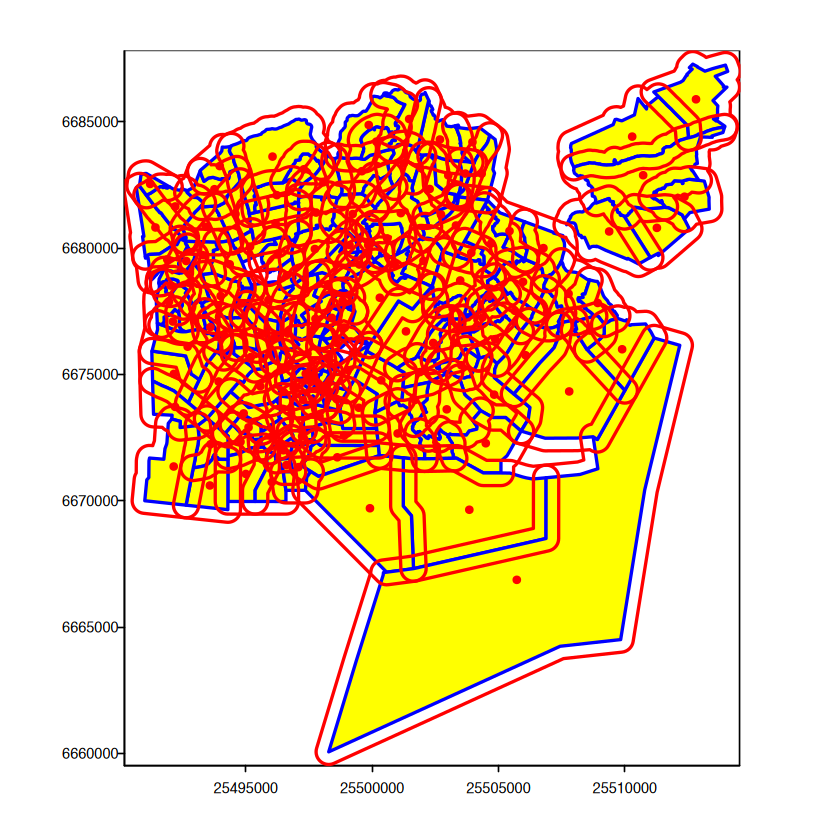

[1] "MAKA_vistra_21_McVihersormi_kp"                  
 [2] "gpkg_contents"                                   
 [3] "gpkg_extensions"                                 
 [4] "gpkg_geometry_columns"                           
 [5] "gpkg_metadata"                                   
 [6] "gpkg_metadata_reference"                         
 [7] "gpkg_ogr_contents"                               
 [8] "gpkg_spatial_ref_sys"                            
 [9] "gpkg_tile_matrix"                                
[10] "gpkg_tile_matrix_set"                            
[11] "rtree_MAKA_vistra_21_McVihersormi_kp_geom"       
[12] "rtree_MAKA_vistra_21_McVihersormi_kp_geom_node"  
[13] "rtree_MAKA_vistra_21_McVihersormi_kp_geom_parent"
[14] "rtree_MAKA_vistra_21_McVihersormi_kp_geom_rowid" 
[15] "sqlite_sequence"

Warning message:
“[vect] returning polygons ignoring additional geometry types. Use 'svc' to get all geometries”


$MAKA_vistra_21_McVihersormi_kp
 class       : SpatVector 
 geometry    : polygons 
 dimensions  : 269, 10  (geometries, attributes)
 extent      : 25491458, 25510432, 6668502, 6685104  (xmin, xmax, ymin, ymax)
 source      : MAKA_vistra_21_McVihersormi_kp.gpkg
 coord. ref. : ETRS89 / GK25FIN (EPSG:3879) 
 names       :          gml_id    id    gml_id2 kohdetyyppi   kommentti numero
 type        :           <chr> <int>      <chr>       <chr>       <chr>  <int>
 values      : MAKA_vistra_21~   749 Vihersormi  Vihersormi Länsipuisto     NA
               MAKA_vistra_21~   750 Vihersormi  Vihersormi Länsipuisto     NA
               MAKA_vistra_21~   751 Vihersormi  Vihersormi Länsipuisto     NA
  nimi tyyppi datanomistaja paivitetty_tietopalveluun
 <chr>  <chr>         <chr>                     <chr>
    NA     NA Helsinki/MAKA           2024-03-12T00:~
    NA     NA Helsinki/MAKA           2024-03-12T00:~
    NA     NA Helsinki/MAKA           2024-03-12T00:~


Warning message:
“[vect] returning polygons ignoring additional geometry types. Use 'svc' to get all geometries”


[1] "gml_id"                    "id"                       
 [3] "gml_id2"                   "kohdetyyppi"              
 [5] "kommentti"                 "numero"                   
 [7] "nimi"                      "tyyppi"                   
 [9] "datanomistaja"             "paivitetty_tietopalveluun"

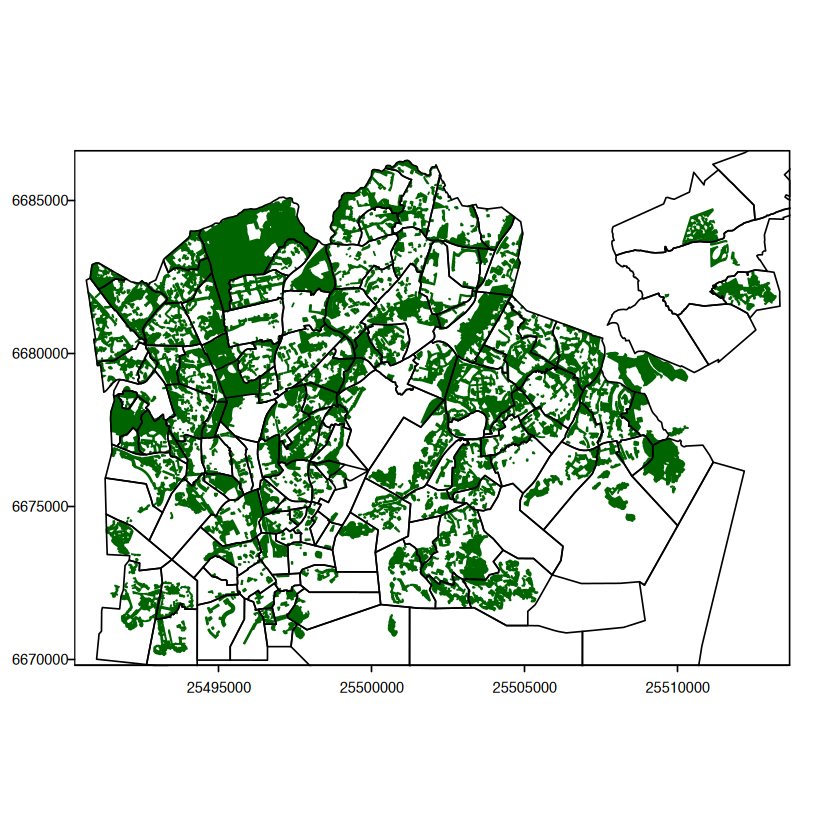

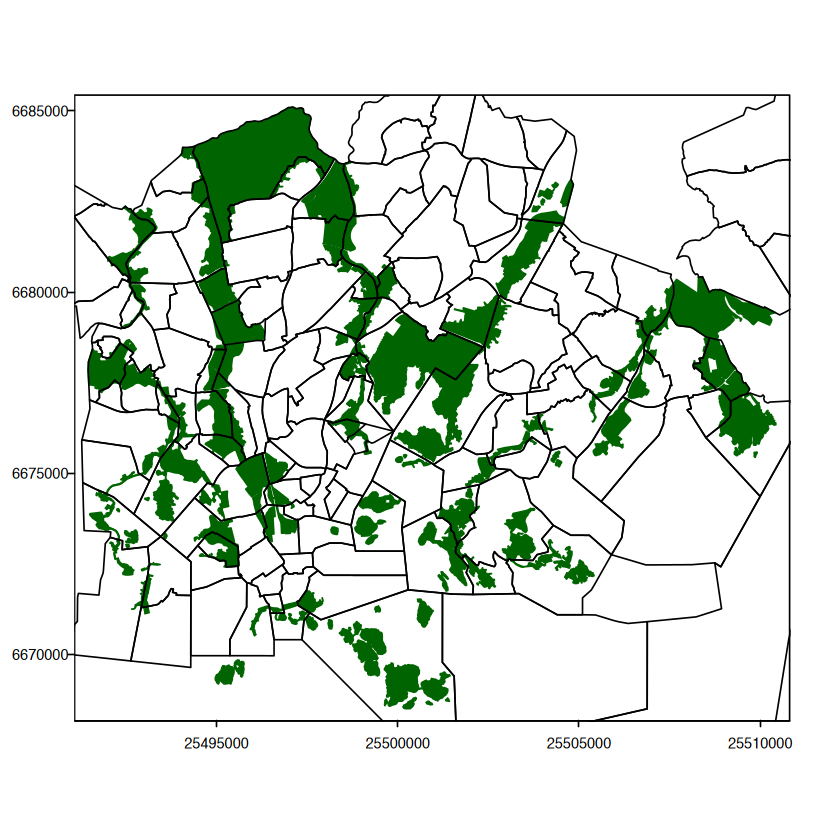

[1] "gml_id"                    "id"                       
 [3] "gml_id2"                   "kohdetyyppi"              
 [5] "kommentti"                 "numero"                   
 [7] "nimi"                      "tyyppi"                   
 [9] "datanomistaja"             "paivitetty_tietopalveluun"

[1] "gml_id"                    "viheralue_id"             
 [3] "puistonumero"              "puistonimi_id"            
 [5] "puiston_nimi"              "osoite"                   
 [7] "kaavamerkinta"             "kaavamerkinta_teksti"     
 [9] "luokka"                    "kayttotark_id"            
[11] "kayttotarkoitus"           "omistaja"                 
[13] "vuokraus"                  "vuokraaja"                
[15] "rakentamisen_tila"         "lisatieto"                
[17] "kaupunginosa"              "osa_alue"                 
[19] "suurpiiri"                 "viheralueen_pa"           
[21] "alue_luonti_pvm"           "paivitetty_pvm"           
[23] "datanomistaja"             "paivitetty_tietopalveluun"

[1] "gml_id"                    "viheralue_id"             
 [3] "puistonumero"              "puistonimi_id"            
 [5] "puiston_nimi"              "osoite"                   
 [7] "kaavamerkinta"             "kaavamerkinta_teksti"     
 [9] "luokka"                    "kayttotark_id"            
[11] "kayttotarkoitus"           "omistaja"                 
[13] "vuokraus"                  "vuokraaja"                
[15] "rakentamisen_tila"         "lisatieto"                
[17] "kaupunginosa"              "osa_alue"                 
[19] "suurpiiri"                 "viheralueen_pa"           
[21] "alue_luonti_pvm"           "paivitetty_pvm"           
[23] "datanomistaja"             "paivitetty_tietopalveluun"
[25] "id"                        "gml_id2"                  
[27] "kohdetyyppi"               "kommentti"                
[29] "numero"                    "nimi"                     
[31] "tyyppi"

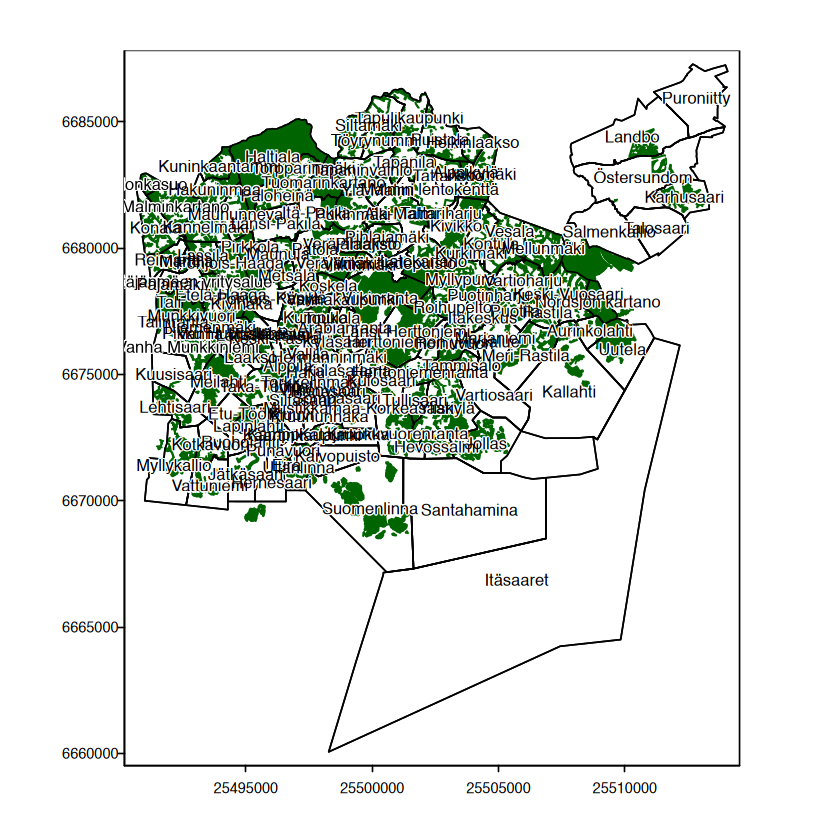

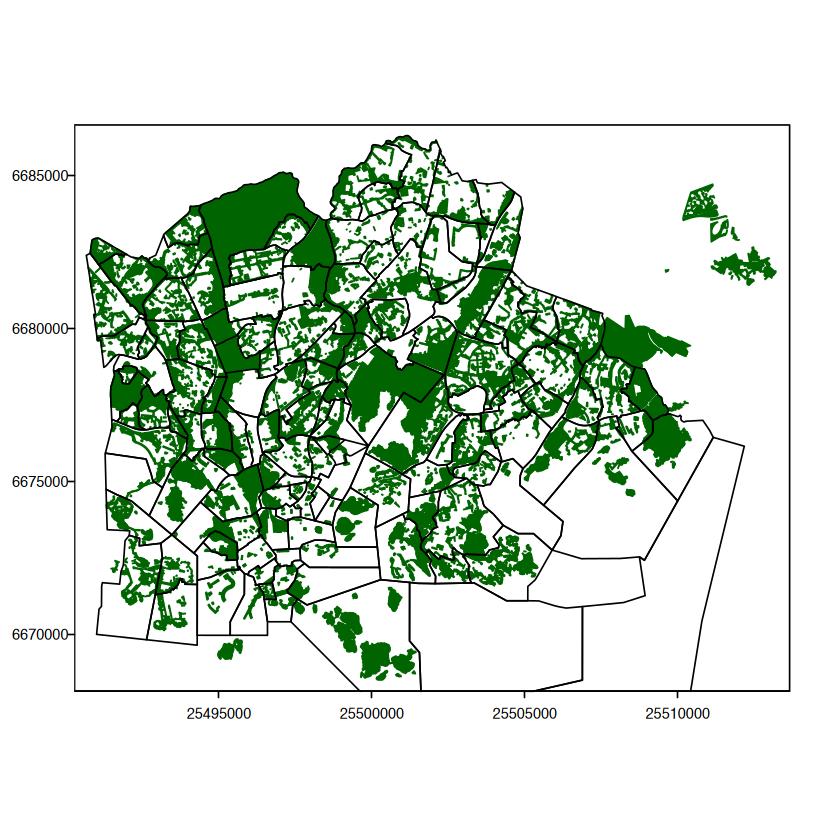

centroids {terra},R Documentation
x,SpatVector
inside,"logical. If TRUE the points returned are guaranteed to be inside the polygons or on the lines, but they are not the true centroids. True centroids may be outside a polygon, for example when a polygon is ""bean shaped"", and they are unlikely to be on their line"


In [9]:
# Maarja's code:
# Sustainability in Computer and Data Sciences 2025
# Project work
# Pavlína Křenková, Maarja Mustimets, Dominik Répás, Helen Tirkkonen

# Necessary packages
library(dplyr)
library(readxl)
library(terra)
library(gpkg)
library(reshape2) # for colsplit()

# Read in the data
folder <- "/Users/pavlina/Documents/Helsinki/2nd_Semester/Sustainability_DS/project/folder/"


#*--- District data ------------------------------------------------------------
# First goal: I want to calculate the center of all the district polygons
?centroids # I need a SpatVector input 
?buffer # also SpatVector or SpatRaster input

# Data:
data_district <- geopackage(paste0(folder, "Helsinki map service_City sub-districts_20250304_160753/osaalueet_WFS.gpkg"), connect = TRUE)
gpkg_list_tables(data_district)
data_district_sub <- gpkg_table(data_district, "osaalueet_WFS", collect = TRUE)
head(data_district_sub)

gpkg_tables(data_district, collect = TRUE) # gpkg_tables lists all the content tables/geometries/relevant stuff it seems
  # class of osaalueet_WFS: SpatVector! but actually this is a data.frame, and cannot be used like a SpatVector:
#centroids(data_district_sub)

# I have to read it in as a vector:
districts_vect <- gpkg_vect(data_district, "osaalueet_WFS")
districts_vect
centroids(districts_vect)

plot(districts_vect, las=1)
plot(districts_vect, border='blue', col='yellow', lwd=2, add=TRUE)
points(centroids(districts_vect), col='red', pch=20, cex=1)
# The big areas are actually sea, probably need to delete those later

# Also, I assume that this district data is "current"? On the map page it says:
# Ajantasaisuuspäivämäärä:	2025-01-02
# Aineiston päivityspäivämäärä: jatkuva ylläpito
# Vakioitu tuloste: Painettu Helsingin Kiinteistökartta (uusin vuodelta 2013)
# So it has been stable since 2013 at least?


#*--- Income data --------------------------------------------------------------
data_income <- read_xlsx(paste0(folder, "Helsingin alueen valtionveronalaisten tulojen mukaan osa-aluettain 2010-.xlsx"))
# comes in a really weird shape, let's fix it
income <- data.frame()
for (i in 2010:2022) {
  columnr_start <- 2 + (i-2009-1)*2 + 1
  print(columnr_start)
  tmp <- data_income[4:378, c(1, columnr_start:(columnr_start+1))] %>% 
    cbind(as.data.frame(rep(i, 378-3)))
  names(tmp) <- c("Area","Population 31.12","Mean taxable income (euros)","Year")
  income <- rbind(income, tmp)
}
# should separate the Area code and name, like in the district data
income <- cbind(income, colsplit(income$Area, " ", (c("kunta","tunnus","name_fi")))) %>%
  filter(kunta==91 & name_fi!="") %>% 
  mutate(tunnus = ifelse(nchar(tunnus)==2, paste0("0",tunnus), tunnus)) # something to help restore the lost zeroes
str(income)
# change the data types for numeric variables
income <- income %>%
  mutate(`Mean taxable income (euros)` = ifelse(`Mean taxable income (euros)`=="..", 0, as.double(`Mean taxable income (euros)`)),
         `Population 31.12` = as.integer(`Population 31.12`))

#write.csv(income, paste0(folder,"income data_processed.csv"))

# Are there areas with very few people, so income statistics cannot be published?
# income %>% arrange(`Mean taxable income (euros)`) %>% head() # absolutely
# income[income$name_fi %in% c("Itäsaaret","Santahamina"), c(2:4,7)] # NOT DONE


#*--- How does the data on the districts and income line up? -------------------
districts <- gpkg_table(data_district, "osaalueet_WFS", collect = TRUE) %>% select(tunnus) %>% unlist()
table(districts %in% income$tunnus, useNA="i")
  # FALSE  TRUE 
  #     8   140 
districts[!(districts %in% income$tunnus)]
data_district_sub[!(data_district_sub$tunnus %in% income$tunnus), c("kunta","tunnus","nimi_fi")] 
  # these are missing from income data ...but they are not residential areas, or have such a low pop that stats cannot be published
# I remove these districts from the list and also the SpatVector object:
districts_vect <- subset(districts_vect, districts_vect$tunnus %in% income$tunnus)
districts_vect
# We are left with 140 districts

plot(districts_vect, las=1)
plot(districts_vect, border='blue', col='yellow', lwd=2, add=TRUE)
points(centroids(districts_vect), col='red', pch=20, cex=1)
# Still some big coastal areas, but they all have income data now

plot(districts_vect, las=1)
plot(districts_vect, border='blue', col='yellow', lwd=2, add=TRUE)
points(centroids(districts_vect), col='red', pch=20, cex=1)
plot(buffer(centroids(districts_vect), width = 1000), border='red', lwd=2, add=TRUE)
# As the districts are very different in size, 
  # the buffer around the centroid may or may not cover the district
# What if I do not use a centroid, just the district polygon?
plot(districts_vect, las=1)
plot(districts_vect, border='blue', col='yellow', lwd=2, add=TRUE)
points(centroids(districts_vect), col='red', pch=20, cex=1)
plot(buffer(districts_vect, width = 500), border='red', lwd=2, add=TRUE)

# I probably have to experiment to find the best solution


#*--- Green area data: zoned green areas ---------------------------------------
# "Register of public areas in the City of Helsinki"
# Aineistoa ylläpidetään toimialan käyttöön eikä se pääsääntöisesti kata muiden Helsingin 
# kaupungin hallintokuntien tai laitosten vastuulla olevien yleisten alueiden omaisuuseriä."
  # So does not cover property managed by district governments or other public services (roughly translated)
# Julkaisuajankohta: 11.8.2014
data_zonedgreen <- geopackage(paste0(folder, "Helsinki map service_Zoned green areas/Ylre_viheralue_asemakaavoitettu.gpkg"), connect = TRUE)
gpkg_list_tables(data_zonedgreen)
gpkg_tables(data_zonedgreen, collect = TRUE)

zonedgreen_vect <- gpkg_vect(data_zonedgreen, "Ylre_viheralue_asemakaavoitettu")
names(zonedgreen_vect)
table(zonedgreen_vect$rakentamisen_tila)
# Seems like some of these might not have "been built" yet at the time of publishing?


plot(zonedgreen_vect, las=1, border='darkgreen', col='darkgreen')
plot(districts_vect, las=1, add=TRUE)

#*--- Green area data: Green finger --------------------------------------------
# "Helsingin tavoitteellinen viher- ja virkistysverkostokartta" / "VISTRA"
# "ne on esitetty vahvistamattoman v. 2016 suunnittelutilanteen mukaisesti"
  # This is green areas as planned, maybe not as they currently exist.
  # HOWEVER, this covers many green areas that are not covered by the register of public areas,
  # Such as the whole Viikki/Lammassaari bay area and many others
  # So I think it is a good supplement
# Aineiston julkaisupäivämäärä:	6.10.2016
data_greenfinger <- geopackage(paste0(folder, "Helsinki map service_Green finger/MAKA_vistra_21_McVihersormi_kp.gpkg"), connect = TRUE)
gpkg_list_tables(data_greenfinger)
gpkg_tables(data_greenfinger, collect = TRUE)

greenfinger_vect <- gpkg_vect(data_greenfinger, "MAKA_vistra_21_McVihersormi_kp")
names(greenfinger_vect)

plot(greenfinger_vect, las=1, border='darkgreen', col='darkgreen')
plot(districts_vect, las=1, add=TRUE)

#*--- Green area data: combined (both from Helsinki map service) ---------------
plot(districts_vect, las=1)
plot(greenfinger_vect, las=1, border='darkgreen', col='darkgreen', add=TRUE)
plot(zonedgreen_vect, las=1, border='darkgreen', col='darkgreen', add=TRUE)
plot(districts_vect, las=1, add=TRUE)
# Seems like there isn't green finger data for the districts in the north-east
  # might want to drop those for the analysis for consistency
text(districts_vect, "nimi_fi", cex=.8, halo=TRUE)
# So I need to drop Puroniitty, Landbo, Östersundom, Karhusaari, Talosaari and Salmenkallio
districts_vect <- terra::subset(districts_vect, !districts_vect$nimi_fi %in% c("Puroniitty","Landbo","Östersundom","Karhusaari","Talosaari","Salmenkallio"))
# 134 districts left

names(greenfinger_vect)
names(zonedgreen_vect)

helsinki_green <- rbind(zonedgreen_vect, greenfinger_vect)
names(helsinki_green)
plot(helsinki_green, las=1, border='darkgreen', col='darkgreen')
plot(districts_vect, las=1, add=TRUE)



In [10]:
library(terra)
library(dplyr)

In [11]:
districts_vect <- project(districts_vect, crs(helsinki_green))

In [12]:
helsinki_green_union <- aggregate(helsinki_green) 

# District area (m²) 
districts_vect$district_area_m2 <- expanse(districts_vect)

int_green <- intersect(districts_vect, helsinki_green_union) # Each feature in 'int_green' is a chunk of green area within a particular district

int_green$green_area_m2 <- expanse(int_green) # Compute area of green areas

df_int <- as.data.frame(int_green) 
df_green_summary <- df_int %>% 
  group_by(tunnus) %>%
  summarise(green_area_m2 = sum(green_area_m2, na.rm = TRUE))

In [13]:
df_districts <- as.data.frame(districts_vect)  # non‐spatial data frame
df_districts <- df_districts %>%
  left_join(df_green_summary, by = "tunnus") %>%
  mutate(
    green_area_m2 = ifelse(is.na(green_area_m2), 0, green_area_m2),
    green_fraction = green_area_m2 / district_area_m2
  )


In [14]:
df_incomeYear <- income %>%
  filter(Year == 2022) %>% # I just used the latest year, when I tried 2010 the results were the same
  rename(mean_income = `Mean taxable income (euros)`) %>%
  select(tunnus, mean_income) 

df_final <- df_districts %>%
  left_join(df_incomeYear, by = "tunnus") 

In [15]:
df_final <- df_final %>%
  mutate(
    green10 = ifelse(green_fraction >= 0.10, 1, 0),
    green20 = ifelse(green_fraction >= 0.20, 1, 0),
    green40 = ifelse(green_fraction >= 0.40, 1, 0)
  )

In [17]:
# i will try to add population density as with one of the papers
df_final2 <- df_final %>%
  filter(mean_income > 0 & !is.na(mean_income))
population_data <- read_excel("population.xlsx")

df_final2 <- df_final2 %>%
  left_join(population_data, by = "nimi_fi")

df_final2 <- df_final2 %>%
  mutate(population_density = Population / district_area_m2)

df_final2 <- df_final2 %>%
  mutate(log_population_density = log(population_density))

head(df_final2)

,gml_id,id,aluejako,kunta,tunnus,nimi_fi,nimi_se,yhtluontipvm,yhtmuokkauspvm,yhtdatanomistaja,⋯,district_area_m2,green_area_m2,green_fraction,mean_income,green10,green20,green40,Population,population_density,log_population_density
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Piirijako_osaalue.114470,114470,OSA-ALUE,091,392,Tapanila,Mosabacka,NA,2021-11-23T00:00:00,kmo,⋯,1474894.7,197267.24,0.13375005,37380,1,0,0,6288,0.0042633552,-5.457699
2,Piirijako_osaalue.114471,114471,OSA-ALUE,091,385,Malmin lentokenttä,Malms flygfält,NA,2024-12-09T00:00:00,kmo,⋯,2243676.1,314358.74,0.14010879,35792,1,0,0,2152,0.0009591402,-6.949473
3,Piirijako_osaalue.112880,112880,OSA-ALUE,091,121,Harju,Ås,NA,2019-12-04T00:00:00,NA,⋯,300661.2,19136.03,0.06364648,33727,0,0,0,7244,0.0240935653,-3.725810
4,Piirijako_osaalue.112881,112881,OSA-ALUE,091,122,Alppila,Alphyddan,NA,2021-11-23T00:00:00,NA,⋯,609953.1,291195.50,0.47740639,34723,1,1,1,4346,0.0071251381,-4.944126
5,Piirijako_osaalue.112882,112882,OSA-ALUE,091,130,Etu-Töölö,Främre Tölö,NA,NA,NA,⋯,2344987.1,434932.44,0.18547328,58072,1,0,0,14728,0.0062806316,-5.070285
6,Piirijako_osaalue.114469,114469,OSA-ALUE,091,411,Puistola,Parkstad,NA,2019-12-04T00:00:00,kmo,⋯,2435752.6,470548.07,0.19318385,46600,1,0,0,6576,0.0026997816,-5.914584


In [20]:


fit10_no0 <- glm(green10 ~ mean_income + population_density, family = binomial, data = df_final2)
summary(fit10_no0)


Call:
glm(formula = green10 ~ mean_income + population_density, family = binomial, 
    data = df_final2)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         3.214e+00  6.248e-01   5.144 2.69e-07 ***
mean_income        -3.330e-05  1.067e-05  -3.119  0.00181 ** 
population_density -9.647e+01  4.715e+01  -2.046  0.04076 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 148.94  on 136  degrees of freedom
Residual deviance: 133.31  on 134  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 139.31

Number of Fisher Scoring iterations: 4


In [21]:

fit20_no0 <- glm(green20 ~ mean_income + population_density, family = binomial, data = df_final2)
summary(fit20_no0)


Call:
glm(formula = green20 ~ mean_income + population_density, family = binomial, 
    data = df_final2)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         2.684e+00  6.365e-01   4.216 2.48e-05 ***
mean_income        -3.984e-05  1.229e-05  -3.240  0.00119 ** 
population_density -1.147e+02  5.375e+01  -2.134  0.03283 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.57  on 136  degrees of freedom
Residual deviance: 164.76  on 134  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 170.76

Number of Fisher Scoring iterations: 4


In [22]:
fit20_no0 <- glm(green20 ~ mean_income + population_density, family = binomial, data = df_final2)
summary(fit20_no0)


Call:
glm(formula = green20 ~ mean_income + population_density, family = binomial, 
    data = df_final2)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         2.684e+00  6.365e-01   4.216 2.48e-05 ***
mean_income        -3.984e-05  1.229e-05  -3.240  0.00119 ** 
population_density -1.147e+02  5.375e+01  -2.134  0.03283 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.57  on 136  degrees of freedom
Residual deviance: 164.76  on 134  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 170.76

Number of Fisher Scoring iterations: 4


In [19]:
head(df_final2)

,gml_id,id,aluejako,kunta,tunnus,nimi_fi,nimi_se,yhtluontipvm,yhtmuokkauspvm,yhtdatanomistaja,kokotunnus,paivitetty_tietopalveluun,datanomistaja,district_area_m2,green_area_m2,green_fraction,mean_income,green10,green20,green40
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Piirijako_osaalue.114470,114470,OSA-ALUE,091,392,Tapanila,Mosabacka,NA,2021-11-23T00:00:00,kmo,0915503392,2025-03-03T00:00:00,Helsinki/Kami,1474894.7,197267.24,0.13375005,37380,1,0,0
2,Piirijako_osaalue.114471,114471,OSA-ALUE,091,385,Malmin lentokenttä,Malms flygfält,NA,2024-12-09T00:00:00,kmo,0915503385,2025-03-03T00:00:00,Helsinki/Kami,2243676.1,314358.74,0.14010879,35792,1,0,0
3,Piirijako_osaalue.112880,112880,OSA-ALUE,091,121,Harju,Ås,NA,2019-12-04T00:00:00,NA,0913302121,2025-03-03T00:00:00,Helsinki/Kami,300661.2,19136.03,0.06364648,33727,0,0,0
4,Piirijako_osaalue.112881,112881,OSA-ALUE,091,122,Alppila,Alphyddan,NA,2021-11-23T00:00:00,NA,0913302122,2025-03-03T00:00:00,Helsinki/Kami,609953.1,291195.50,0.47740639,34723,1,1,1
5,Piirijako_osaalue.112882,112882,OSA-ALUE,091,130,Etu-Töölö,Främre Tölö,NA,NA,NA,0911103130,2025-03-03T00:00:00,Helsinki/Kami,2344987.1,434932.44,0.18547328,58072,1,0,0
6,Piirijako_osaalue.114469,114469,OSA-ALUE,091,411,Puistola,Parkstad,NA,2019-12-04T00:00:00,kmo,0915505411,2025-03-03T00:00:00,Helsinki/Kami,2435752.6,470548.07,0.19318385,46600,1,0,0


In [24]:
df_final3 = df_final2[!(df_final2$nimi_fi %in% "Haltiala"),] # just smth I wanted to try, did not lead to anything interesting

In [25]:

fit10_no0 <- glm(green10 ~ mean_income + population_density, family = binomial, data = df_final3)
summary(fit10_no0)


Call:
glm(formula = green10 ~ mean_income + population_density, family = binomial, 
    data = df_final3)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         3.214e+00  6.248e-01   5.144 2.69e-07 ***
mean_income        -3.330e-05  1.067e-05  -3.119  0.00181 ** 
population_density -9.647e+01  4.715e+01  -2.046  0.04076 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 148.94  on 136  degrees of freedom
Residual deviance: 133.31  on 134  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 139.31

Number of Fisher Scoring iterations: 4


In [26]:
cor(df_final3$green_fraction, df_final3$mean_income)

[1] -0.2945317

In [29]:
# Trying a 1‑km “buffer analysis” around each district’s centroid, thoughh some districts be big

#    Find each district’s centroid
#    Create a 1 km buffer around that centroid.
 #   Intersect those buffer polygons with green‐area polygons.
#    Compute the fraction of each buffer that is green.
#    Analyze that fraction vs. income

library(terra)
library(dplyr)

# centroids
district_centroids <- centroids(districts_vect)
district_centroids_1km <- buffer(district_centroids, width = 1000)  # 1000 meters

#Union the green polygons-single geometry to intersect
green_union <- aggregate(helsinki_green)  

# Intersect buffers with the green arcsea
int_buff <- intersect(district_centroids_1km, green_union)

# area of the green chunks
int_buff$green_m2 <- expanse(int_buff)


df_buff <- as.data.frame(int_buff) %>%
  group_by(tunnus) %>% 
  summarise(green_area_m2 = sum(green_m2, na.rm = TRUE))

centroid_buffers_df <- as.data.frame(district_centroids_1km)
centroid_buffers_df$buffer_area_m2 <- expanse(district_centroids_1km)

df_buff <- df_buff %>%
  left_join(centroid_buffers_df %>% select(tunnus, buffer_area_m2),
            by = "tunnus") %>%
  mutate(green_fraction_1km = green_area_m2 / buffer_area_m2)

#Combine with the income data
df_buff2 <- df_buff %>%
  left_join(df_incomeYear, by = "tunnus")

cor(df_buff2$green_fraction_1km, df_buff2$mean_income, use="complete.obs")

fit_linear <- lm(green_fraction_1km ~ mean_income, data = df_buff2)
summary(fit_linear)

fit_logistic <- glm(I(green_fraction_1km > 0.2) ~ mean_income,
                    data=df_buff2, family="binomial")
summary(fit_logistic)


[1] -0.3352488


Call:
lm(formula = green_fraction_1km ~ mean_income, data = df_buff2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34930 -0.08894 -0.00778  0.08033  0.63586 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.537e-01  2.352e-02  15.039  < 2e-16 ***
mean_income -2.052e-06  4.790e-07  -4.285 3.31e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1386 on 145 degrees of freedom
Multiple R-squared:  0.1124,	Adjusted R-squared:  0.1063 
F-statistic: 18.36 on 1 and 145 DF,  p-value: 3.314e-05



Call:
glm(formula = I(green_fraction_1km > 0.2) ~ mean_income, family = "binomial", 
    data = df_buff2)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.898e+00  5.892e-01   4.918 8.75e-07 ***
mean_income -5.345e-05  1.288e-05  -4.151 3.30e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 192.20  on 146  degrees of freedom
Residual deviance: 163.94  on 145  degrees of freedom
AIC: 167.94

Number of Fisher Scoring iterations: 5


In [45]:
# simple OLS
fit_lm <- lm(green_fraction ~ mean_income + population_density, data = df_final2)
summary(fit_lm)


Call:
lm(formula = green_fraction ~ mean_income + population_density, 
    data = df_final2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32183 -0.11561 -0.02049  0.08021  0.50866 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.344e-01  3.854e-02  11.271  < 2e-16 ***
mean_income        -2.793e-06  6.718e-07  -4.157 5.71e-05 ***
population_density -1.063e+01  3.633e+00  -2.927  0.00403 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1712 on 134 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1493,	Adjusted R-squared:  0.1366 
F-statistic: 11.76 on 2 and 134 DF,  p-value: 1.976e-05


In [44]:
# simple OLS
fit_lm <- lm(green_fraction ~ I(mean_income^2) + mean_income + population_density, data = df_final2)
summary(fit_lm)


Call:
lm(formula = green_fraction ~ I(mean_income^2) + mean_income + 
    population_density, data = df_final2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34453 -0.11568 -0.02373  0.06763  0.50089 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.061e-01  7.098e-02   7.130 5.77e-11 ***
I(mean_income^2)    1.609e-11  1.339e-11   1.202  0.23141    
mean_income        -5.300e-06  2.190e-06  -2.420  0.01689 *  
population_density -1.032e+01  3.636e+00  -2.838  0.00526 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1709 on 133 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1584,	Adjusted R-squared:  0.1394 
F-statistic: 8.345 on 3 and 133 DF,  p-value: 3.992e-05


In [33]:
# trying spatial regression - Note: this is probably the best thing we can do but we haven't studied it so it's just a small trial
# not 100% confident!

df_final2_subset <- df_final2[, c("tunnus", "green_fraction", "mean_income", "population_density")]
library(spdep)
library(spatialreg)

library(sf)

# terra SpatVector to an sf object
districts_sf <- st_as_sf(districts_vect)

districts_sf <- districts_sf %>%
  left_join(df_final2_subset,
    by = "tunnus"
  )

districts_sf_filtered <- districts_sf %>%
  filter(!is.na(green_fraction) & !is.na(mean_income))

#Convert to SpatialPolygonsDataFrame
district_sp <- as(districts_sf_filtered, "Spatial")

library(spdep)
nb <- poly2nb(district_sp, queen = TRUE)
lw <- nb2listw(nb, style = "W")

moran.test(district_sp$green_fraction, lw)

# spatial model though im not sure about that
sar_model <- lagsarlm(green_fraction ~ mean_income + population_density, data = district_sp@data, listw = lw)
summary(sar_model)


	Moran I test under randomisation

data:  district_sp$green_fraction  
weights: lw    

Moran I statistic standard deviate = 5.2309, p-value = 8.434e-08
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.254427889      -0.007246377       0.002502460 



Call:lagsarlm(formula = green_fraction ~ mean_income + population_density, 
    data = district_sp@data, listw = lw)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.363052 -0.108701 -0.022304  0.072971  0.513935 

Type: lag 
Coefficients: (asymptotic standard errors) 
                      Estimate  Std. Error z value  Pr(>|z|)
(Intercept)         2.8953e-01  5.1114e-02  5.6644 1.476e-08
mean_income        -2.0670e-06  6.3702e-07 -3.2448  0.001175
population_density -8.2514e+00  3.4430e+00 -2.3965  0.016550

Rho: 0.3938, LR test value: 12.371, p-value: 0.00043601
Asymptotic standard error: 0.10652
    z-value: 3.697, p-value: 0.00021818
Wald statistic: 13.668, p-value: 0.00021818

Log likelihood: 55.08378 for lag model
ML residual variance (sigma squared): 0.025423, (sigma: 0.15945)
Number of observations: 137 
Number of parameters estimated: 5 
AIC: -100.17, (AIC for lm: -89.796)
LM test for residual autocorrelation
test value: 2.2563, p-value: 0.13307


In [33]:
districts_sf <- districts_sf %>%
  left_join(
    df_final2 %>% 
      select(tunnus, green_fraction, mean_income),
    by = "tunnus"
  )

ERROR: Error in select(., tunnus, green_fraction, mean_income): unused arguments (tunnus, green_fraction, mean_income)


In [ ]:
# Try just inner city
inner_city_subset <- c("Kallio", "Kamppi", "Punavuori", "Etu-Töölö", "Sörnäinen")
df_subset <- df_final2 %>%
  filter(nimi_fi %in% inner_city_subset)

fit_sub <- lm(green_fraction ~ mean_income, data = df_subset)
summary(fit_sub) # not significant

In [35]:
library(terra)
library(geodist)
# trying "distance to the nearest green area"

district_centroids <- centroids(districts_vect)


district_centroids$dist_to_green <- distance(district_centroids, helsinki_green_union)

df_dist <- as.data.frame(district_centroids)

df_dist2 <- df_dist %>%
  left_join(
    df_final2 %>% select(tunnus, mean_income),
    by = "tunnus"
  )

# Then correlate/regress with income
cor(df_dist2$dist_to_green, df_dist2$mean_income, use="complete.obs")
lm_dist <- lm(dist_to_green ~ mean_income, data = df_dist2)
summary(lm_dist)


Warning message:
“package ‘geodist’ was built under R version 4.3.3”


[1] 0.2081624


Call:
lm(formula = dist_to_green ~ mean_income, data = df_dist2)

Residuals:
    Min      1Q  Median      3Q     Max 
-212.64  -63.05  -39.26   -2.78 1877.25 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -3.6249176 37.3947197  -0.097   0.9229  
mean_income  0.0018401  0.0007387   2.491   0.0139 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 189.8 on 137 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.04333,	Adjusted R-squared:  0.03635 
F-statistic: 6.205 on 1 and 137 DF,  p-value: 0.01393


In [40]:
# trying spatial regression - Note: this is probably the best thing we can do but we haven't studied it so it's just a small trial
# not 100% confident!

df_dist2 <- df_dist2[, c("tunnus", "dist_to_green", "mean_income")]

library(sf)

# terra SpatVector to an sf object
districts_sf <- st_as_sf(districts_vect)

districts_sf <- districts_sf %>%
  left_join(df_dist2,
    by = "tunnus"
  )

districts_sf_filtered <- districts_sf %>%
  filter(!is.na(dist_to_green) & !is.na(mean_income))

#Convert to SpatialPolygonsDataFrame
district_sp <- as(districts_sf_filtered, "Spatial")

library(spdep)
nb <- poly2nb(district_sp, queen = TRUE)
lw <- nb2listw(nb, style = "W")


# spatial model though im not sure about that
sar_model <- lagsarlm(dist_to_green ~ mean_income, data = district_sp@data, listw = lw)
summary(sar_model)


Call:lagsarlm(formula = dist_to_green ~ mean_income, data = district_sp@data, 
    listw = lw)

Residuals:
       Min         1Q     Median         3Q        Max 
-219.35692  -63.25442  -37.94862   -0.60369 1874.35144 

Type: lag 
Coefficients: (asymptotic standard errors) 
               Estimate  Std. Error z value Pr(>|z|)
(Intercept) -0.26586541 37.99139315 -0.0070  0.99442
mean_income  0.00187709  0.00073537  2.5526  0.01069

Rho: -0.06374, LR test value: 0.24089, p-value: 0.62356
Asymptotic standard error: 0.14144
    z-value: -0.45066, p-value: 0.65223
Wald statistic: 0.20309, p-value: 0.65223

Log likelihood: -925.326 for lag model
ML residual variance (sigma squared): 35436, (sigma: 188.25)
Number of observations: 139 
Number of parameters estimated: 4 
AIC: 1858.7, (AIC for lm: 1856.9)
LM test for residual autocorrelation
test value: 5.4769e-05, p-value: 0.9941


In [34]:
head(df_dist)


,gml_id,id,aluejako,kunta,tunnus,nimi_fi,nimi_se,yhtluontipvm,yhtmuokkauspvm,yhtdatanomistaja,kokotunnus,paivitetty_tietopalveluun,datanomistaja,district_area_m2,dist_to_green
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Piirijako_osaalue.114470,114470,OSA-ALUE,091,392,Tapanila,Mosabacka,NA,2021-11-23T00:00:00,kmo,0915503392,2025-03-03T00:00:00,Helsinki/Kami,1474894.7,56.28056
2,Piirijako_osaalue.114471,114471,OSA-ALUE,091,385,Malmin lentokenttä,Malms flygfält,NA,2024-12-09T00:00:00,kmo,0915503385,2025-03-03T00:00:00,Helsinki/Kami,2243676.1,209.85454
3,Piirijako_osaalue.112880,112880,OSA-ALUE,091,121,Harju,Ås,NA,2019-12-04T00:00:00,NA,0913302121,2025-03-03T00:00:00,Helsinki/Kami,300661.2,79.85181
4,Piirijako_osaalue.112881,112881,OSA-ALUE,091,122,Alppila,Alphyddan,NA,2021-11-23T00:00:00,NA,0913302122,2025-03-03T00:00:00,Helsinki/Kami,609953.1,0.00000
5,Piirijako_osaalue.112882,112882,OSA-ALUE,091,130,Etu-Töölö,Främre Tölö,NA,NA,NA,0911103130,2025-03-03T00:00:00,Helsinki/Kami,2344987.1,0.00000
6,Piirijako_osaalue.114469,114469,OSA-ALUE,091,411,Puistola,Parkstad,NA,2019-12-04T00:00:00,kmo,0915505411,2025-03-03T00:00:00,Helsinki/Kami,2435752.6,213.74495
